In [1]:
!pip install Ipython

import librosa
import numpy as np
import time
import matplotlib.pyplot as plt
import torchaudio
import IPython
from IPython.display import Audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%cd '/content/drive/MyDrive/横串/Griffin-Lim'
!ls

/content/drive/MyDrive/横串/Griffin-Lim
01_桃太郎_0000_fujita_voice.wav    abs_ifft.wav   Griffin-Lim_0610.ipynb
01_桃太郎_0000_fujita_whisper.wav  bou_short.wav  Griffin-Lim.ipynb
3_朗読（坊ちゃん）.wav		   EL


# 坊ちゃんで位相復元を試した

In [3]:
#param設定
n_fft = 4096
frame_shift = n_fft//20

In [4]:
#waveの読み込み
wave, fs = librosa.load('bou_short.wav',sr = 44100)

#FFT
freq_tmp = librosa.stft(wave,n_fft = n_fft, hop_length = frame_shift,  win_length=n_fft)

#IFFT
S = librosa.istft(freq_tmp, hop_length = frame_shift, win_length=n_fft)

#絶対値をとってからIFFT
X = np.abs(freq_tmp)
S_abs = librosa.istft(X, hop_length = frame_shift, win_length=n_fft)

print("S : FFT→IFFT")
IPython.display.display(Audio(S, rate=fs))
print("S_abs : FFT→abs→IFFT")
IPython.display.display(Audio(S_abs, rate=fs))


S : FFT→IFFT


S_abs : FFT→abs→IFFT


In [5]:
#Grifin-limによる位相復元
start = time.time()
y1 = librosa.griffinlim(X,hop_length = frame_shift, n_iter=1)
time_1 = time.time()
y2 = librosa.griffinlim(X,hop_length = frame_shift, n_iter=100)
time_2 = time.time()
print('itr1回で，', time_1 - start, 'secです')
print('itr100回で，', time_2 - time_1, 'secです')

itr1回で， 0.7208828926086426 secです
itr100回で， 24.305155754089355 secです


S : FFT→IFFT


y1 : FFT→abs→IFFT→Grifin-lim 繰り返し数1回


y2 : FFT→abs→IFFT→Grifin-lim 繰り返し数100回


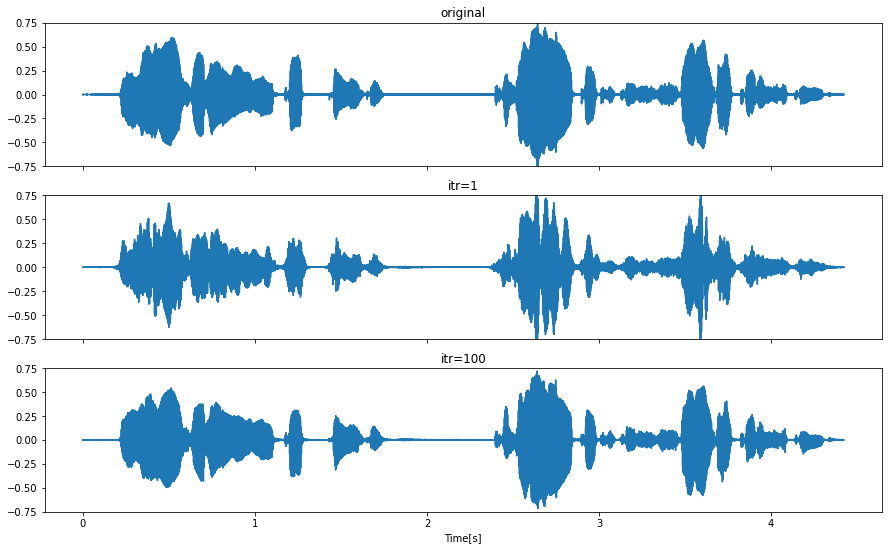

In [6]:
#音と時間波形の出力

fig, ax = plt.subplots(3,1, figsize = (15,9), sharex =True)
time_axis = np.arange(len(y1))/fs

ax[0].plot(time_axis,S)
ax[0].set_title("original")
ax[0].set_ylim(-0.75,0.75)

ax[1].plot(time_axis,y1)
ax[1].set_title("itr=1")
ax[1].set_ylim(-0.75,0.75)

ax[2].plot(time_axis,y2)
ax[2].set_title("itr=100")
ax[2].set_xlabel("Time[s]")
ax[2].set_ylim(-0.75,0.75)

print("S : FFT→IFFT")
IPython.display.display(Audio(S, rate=fs))
print("y1 : FFT→abs→IFFT→Grifin-lim 繰り返し数1回")
IPython.display.display(Audio(y1, rate=fs))
print("y2 : FFT→abs→IFFT→Grifin-lim 繰り返し数100回")
IPython.display.display(Audio(y2, rate=fs))

元の信号との差分の算出


(-1.5, 1.5)

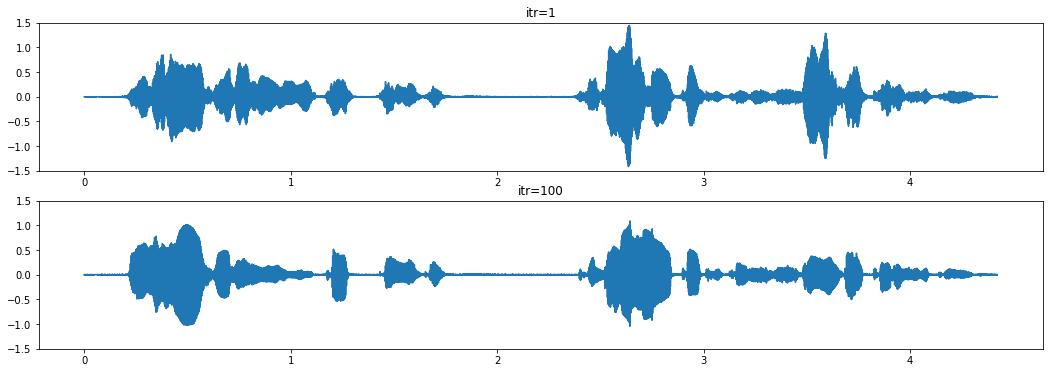

In [7]:
print("元の信号との差分の算出")

fig, ax = plt.subplots(2,1, figsize = (18,6))
diff1 = y1 - S
ax[0].plot(time_axis,diff1)
ax[0].set_title("itr=1")
ax[0].set_ylim(-1.5,1.5)

diff2 = y2 - S
im =ax[1].plot(time_axis, diff2)
ax[1].set_title("itr=100")
ax[1].set_ylim(-1.5,1.5)

# fig.colorbar(im, shrink=0.75)

位相スぺクトログラムのプロット


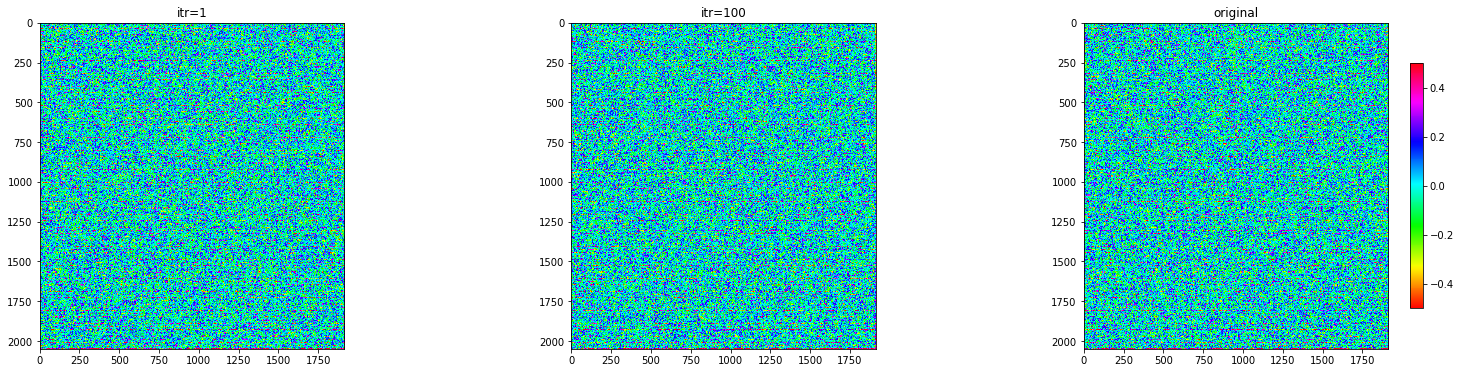

In [8]:
print("位相スぺクトログラムのプロット")

n_fft = 4096
frame_shift = n_fft//40

#位相の算出
y1_spec = librosa.stft(y1,n_fft = n_fft, hop_length = frame_shift,  win_length=n_fft)
y2_spec = librosa.stft(y2,n_fft = n_fft, hop_length = frame_shift,  win_length=n_fft)
S_spec = librosa.stft(S,n_fft = n_fft, hop_length = frame_shift,  win_length=n_fft)


y1_phase = np.angle(y1_spec)
y2_phase = np.angle(y2_spec)
S_phase = np.angle(S_spec)

range = 0.5

fig, ax = plt.subplots(1,3, figsize = (27,6))
# time_axis = np.arange(y1_phase.shape[1])/fs
# tmp = y1_phase-np.min(y1_phase)
# tmp = np.log(tmp/np.max(tmp)+0.0001)
ax[0].imshow(y1_phase, cmap ="hsv",vmax=range, vmin=-1*range)
ax[0].set_title("itr=1")

# tmp = y1_phase-np.min(y2_phase)
# tmp = np.log(tmp/np.max(tmp)+0.0001)
ax[1].imshow(y2_phase, cmap = "hsv",vmax=range, vmin=-1*range) #jet
ax[1].set_title("itr=100")

im = ax[2].imshow(S_phase, cmap = "hsv",vmax=range, vmin=-1*range)
ax[2].set_title("original")

fig.colorbar(im, shrink=0.75)
ori_phase_bou = S_phase

位相の差分の算出


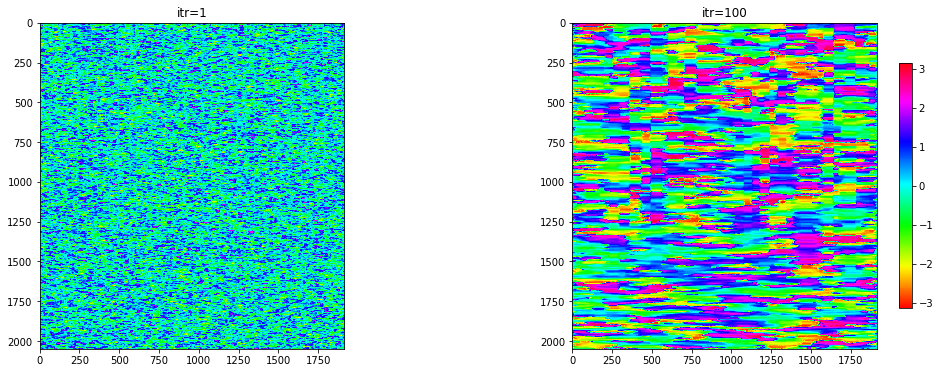

In [9]:
print("位相の差分の算出")
range = 3.14 
fig, ax = plt.subplots(1,2, figsize = (18,6))


diff1 = np.angle(y1_spec/ S_spec)
ax[0].imshow(diff1, cmap = "hsv",vmax=range, vmin=-1*range)


ax[0].set_title("itr=1")

#絶対値とらない
diff2 = np.angle(y2_spec/ S_spec)
im =ax[1].imshow(diff2, cmap = "hsv",vmax=range, vmin=-1*range)


ax[1].set_title("itr=100")

fig.colorbar(im, shrink=0.75)

# 桃太郎でもやった

In [10]:
n_fft = 2048
frame_shift = n_fft//20

In [11]:
wave, fs = librosa.load('01_桃太郎_0000_fujita_voice.wav',sr = 16000)

#FFT
freq_tmp = librosa.stft(wave,n_fft = n_fft, hop_length = frame_shift,  win_length=n_fft)

#IFFT
S = librosa.istft(freq_tmp, hop_length = frame_shift, win_length=n_fft)

#絶対値をとってからIFFT
X = np.abs(freq_tmp)
S_abs = librosa.istft(X, hop_length = frame_shift, win_length=n_fft)

print("S : FFT→IFFT")
IPython.display.display(Audio(S, rate=fs))
print("S_abs : FFT→abs→IFFT")
IPython.display.display(Audio(S_abs, rate=fs))

S : FFT→IFFT


S_abs : FFT→abs→IFFT


In [12]:
#Grifin-limによる位相復元
start = time.time()
y1 = librosa.griffinlim(X,hop_length = frame_shift, n_iter=1)
time_1 = time.time()
y2 = librosa.griffinlim(X,hop_length = frame_shift, n_iter=100)
time_2 = time.time()
print('itr1回で，', time_1 - start, 'secです')
print('itr100回で，', time_2 - time_1, 'secです')

itr1回で， 0.26130032539367676 secです
itr100回で， 9.48262619972229 secです


S : FFT→IFFT


y1 : FFT→abs→IFFT→Grifin-lim 繰り返し数1回


y2 : FFT→abs→IFFT→Grifin-lim 繰り返し数100回


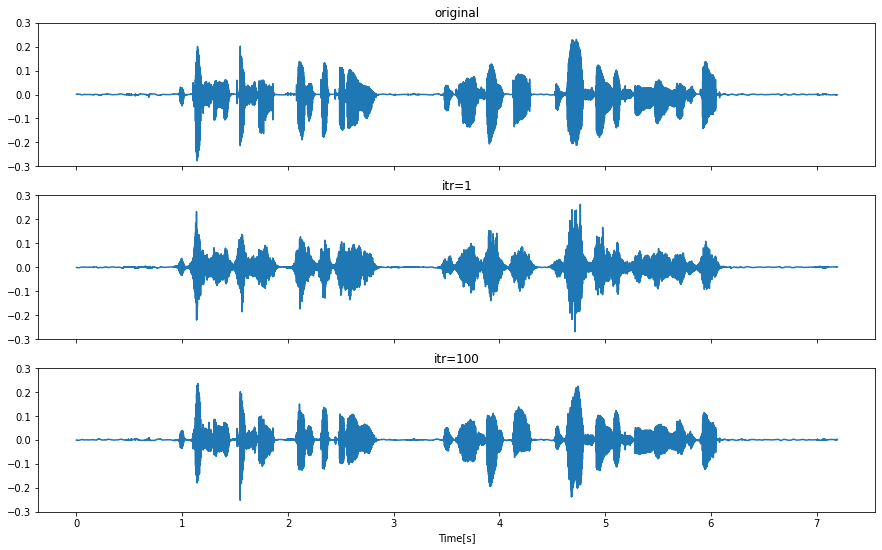

In [13]:
#音と時間波形の出力

fig, ax = plt.subplots(3,1, figsize = (15,9), sharex =True)
time_axis = np.arange(len(y1))/fs

ax[0].plot(time_axis,S)
ax[0].set_title("original")
ax[0].set_ylim(-0.3,0.3)

ax[1].plot(time_axis,y1)
ax[1].set_title("itr=1")
ax[1].set_ylim(-0.3,0.3)

ax[2].plot(time_axis,y2)
ax[2].set_title("itr=100")
ax[2].set_xlabel("Time[s]")
ax[2].set_ylim(-0.3,0.3)

print("S : FFT→IFFT")
IPython.display.display(Audio(S, rate=fs))
print("y1 : FFT→abs→IFFT→Grifin-lim 繰り返し数1回")
IPython.display.display(Audio(y1, rate=fs))
print("y2 : FFT→abs→IFFT→Grifin-lim 繰り返し数100回")
IPython.display.display(Audio(y2, rate=fs))

元の信号との差分の算出


(-0.45, 0.45)

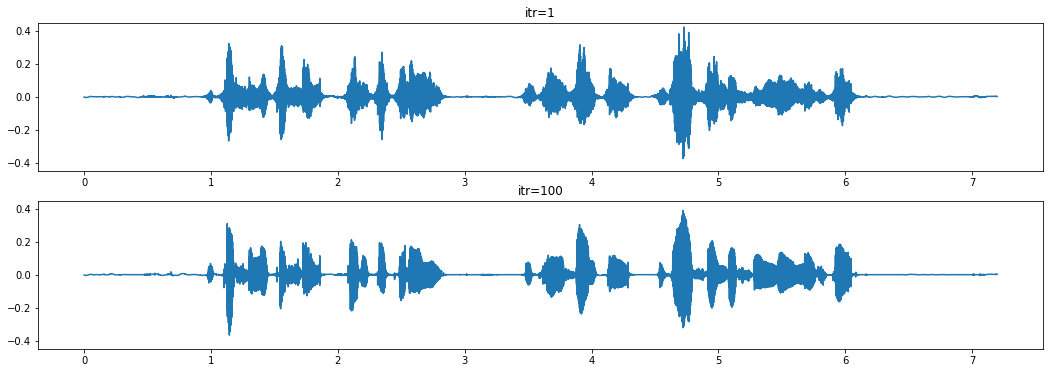

In [14]:
print("元の信号との差分の算出")

fig, ax = plt.subplots(2,1, figsize = (18,6))
diff1 = y1 - S
ax[0].plot(time_axis,diff1)
ax[0].set_title("itr=1")
ax[0].set_ylim(-0.45,0.45)

diff2 = y2 - S
im =ax[1].plot(time_axis, diff2)
ax[1].set_title("itr=100")
ax[1].set_ylim(-0.45,0.45)

# fig.colorbar(im, shrink=0.75)

位相スぺクトログラムのプロット


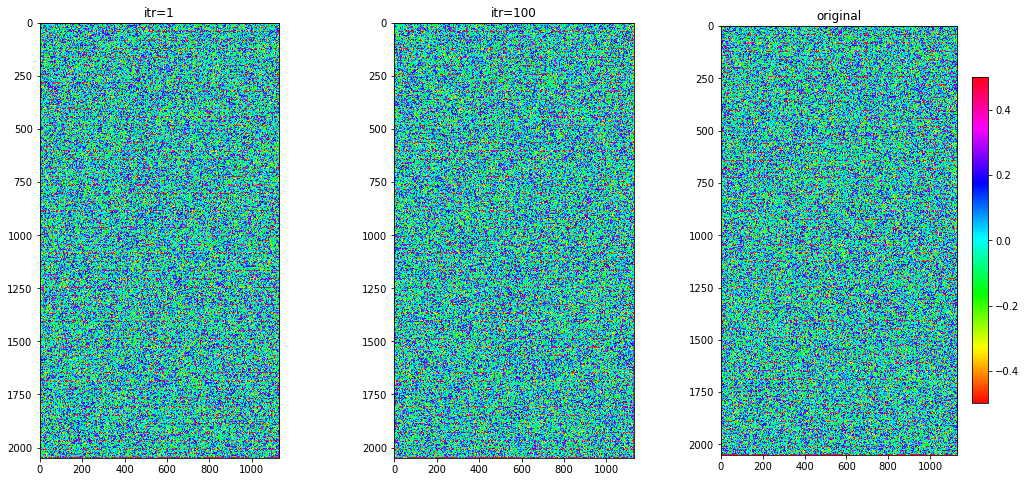

In [15]:
print("位相スぺクトログラムのプロット")

n_fft = 4096
frame_shift = n_fft//40

#位相の算出
y1_spec = librosa.stft(y1,n_fft = n_fft, hop_length = frame_shift,  win_length=n_fft)
y2_spec = librosa.stft(y2,n_fft = n_fft, hop_length = frame_shift,  win_length=n_fft)
S_spec = librosa.stft(S,n_fft = n_fft, hop_length = frame_shift,  win_length=n_fft)


y1_phase = np.angle(y1_spec)
y2_phase = np.angle(y2_spec)
S_phase = np.angle(S_spec)

range = 0.5

fig, ax = plt.subplots(1,3, figsize = (18,8))
# time_axis = np.arange(y1_phase.shape[1])/fs
tmp = y1_phase-np.min(y1_phase)
tmp = np.log(tmp/np.max(tmp)+0.0001)
ax[0].imshow(y1_phase, cmap = "hsv",vmax=range, vmin=-1*range)
ax[0].set_title("itr=1")

tmp = y1_phase-np.min(y2_phase)
tmp = np.log(tmp/np.max(tmp)+0.0001)
ax[1].imshow(y2_phase, cmap = "hsv",vmax=range, vmin=-1*range)
ax[1].set_title("itr=100")

im = ax[2].imshow(S_phase, cmap = "hsv",vmax=range, vmin=-1*range)
ax[2].set_title("original")

fig.colorbar(im, shrink=0.75)
ori_phase_bou = S_phase

位相の差分の算出


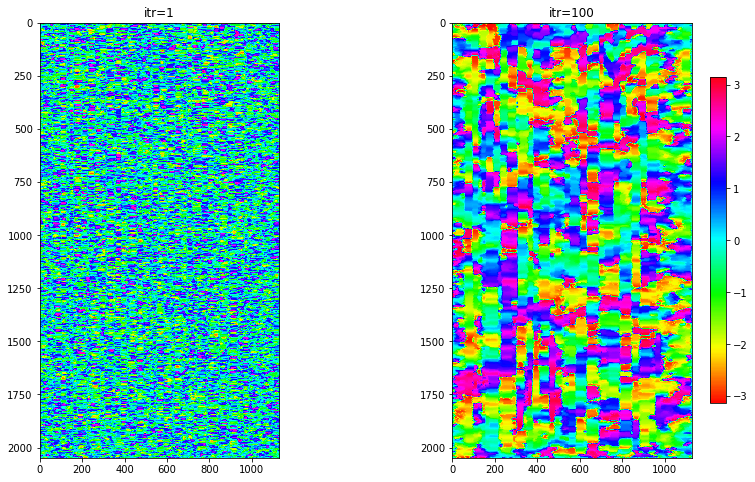

In [16]:
print("位相の差分の算出")
range = 3.14 
fig, ax = plt.subplots(1,2, figsize = (14,8))


diff1 = np.angle(y1_spec/ (S_spec+0.000001))
ax[0].imshow(diff1, cmap = "hsv",vmax=range, vmin=-1*range)


ax[0].set_title("itr=1")

#絶対値とらない
diff2 = np.angle(y2_spec/ (S_spec+0.000001))
im =ax[1].imshow(diff2, cmap = "hsv",vmax=range, vmin=-1*range)


ax[1].set_title("itr=100")

fig.colorbar(im, shrink=0.75)